<a href="https://colab.research.google.com/github/YohansHailu/a2sv_ml_track/blob/main/on_bloarding_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%xmode Minimal

Exception reporting mode: Minimal


In [6]:
##
import pandas as pd 

In [7]:
imdb_top = pd.read_csv("./imdb_top_1000.csv")

In [8]:
##
imdb_top.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [12]:
## name of the columns
columns_names = list(imdb_top.columns)
columns_names

['Poster_Link',
 'Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'IMDB_Rating',
 'Overview',
 'Meta_score',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'No_of_Votes',
 'Gross']

In [10]:
## average rating
rating_average = imdb_top["IMDB_Rating"].mean()

In [11]:
##
imdb_top["Genre"].head()

0                   Drama
1            Crime, Drama
2    Action, Crime, Drama
3            Crime, Drama
4            Crime, Drama
Name: Genre, dtype: object

In [13]:
uniq_genres  = set()
for row in imdb_top["Genre"]:
    for genre_name in set(row.split(",")):
        uniq_genres.add(genre_name.strip())

uniq_genres = list(uniq_genres)
print(uniq_genres)


['Biography', 'Mystery', 'Adventure', 'History', 'Film-Noir', 'Animation', 'Sci-Fi', 'Music', 'Romance', 'Horror', 'Action', 'Family', 'Western', 'War', 'Comedy', 'Crime', 'Musical', 'Drama', 'Thriller', 'Fantasy', 'Sport']


In [14]:
uniq_genres = list(uniq_genres)
print(uniq_genres)

['Biography', 'Mystery', 'Adventure', 'History', 'Film-Noir', 'Animation', 'Sci-Fi', 'Music', 'Romance', 'Horror', 'Action', 'Family', 'Western', 'War', 'Comedy', 'Crime', 'Musical', 'Drama', 'Thriller', 'Fantasy', 'Sport']


In [15]:
rows = [rating_average, ",".join(columns_names), ",".join(uniq_genres)]
columns=["rating_average", "columns_names", "all_uniq_genres"]
final_result = pd.DataFrame([rows], columns=columns)
final_result.head()


,rating_average,columns_names,all_uniq_genres
0,7.9493,"Poster_Link,Series_Title,Released_Year,Certifi...","Biography,Mystery,Adventure,History,Film-Noir,..."


In [16]:
final_result.to_csv("final_result", index=False)
print("file saved")

file saved


In [19]:
# counting the number of movies for each genre
genre_count = {g:0 for g in uniq_genres}

for genre_row in imdb_top["Genre"]:
    for genre_name in set(genre_row.split(",")):
        genre_name = genre_name.strip()
        genre_count[genre_name] += 1
genre_count

{'Biography': 109,
 'Mystery': 99,
 'Adventure': 196,
 'History': 56,
 'Film-Noir': 19,
 'Animation': 82,
 'Sci-Fi': 67,
 'Music': 35,
 'Romance': 125,
 'Horror': 32,
 'Action': 189,
 'Family': 56,
 'Western': 20,
 'War': 51,
 'Comedy': 233,
 'Crime': 209,
 'Musical': 17,
 'Drama': 724,
 'Thriller': 137,
 'Fantasy': 66,
 'Sport': 19}

<BarContainer object of 21 artists>

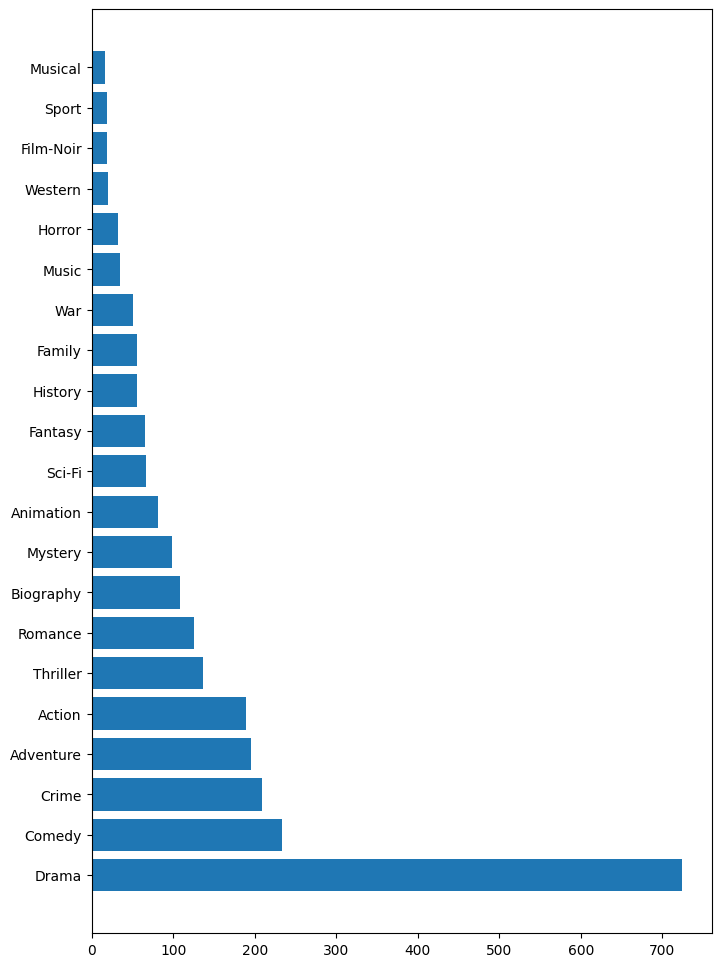

In [22]:
# sorting and seeing the distrbution of each genre using histogram but its actualy a bar
from matplotlib import pyplot as plt
import numpy as np
counts = sorted(genre_count.values())

plt.figure(figsize=(8, 12))

sorted_genre_count = sorted(genre_count.items(), key = lambda x:x[1], reverse=True)

genre_names = [element[0] for element in sorted_genre_count]
genre_counts = [element[1] for element in sorted_genre_count]

plt.barh(genre_names, genre_counts)
